In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer

import warnings

warnings.filterwarnings(action = 'ignore')

### 1. 데이터 로드 및 데이터프레임 정리

In [3]:
tmp_df = pd.read_csv('../data/행정동_기준_동별데이터_버스추가_1028.csv')
pd.set_option('display.max_columns',35)
tmp_df.rename(columns={'Unnamed: 0':'index'},inplace=True)
tmp_df.set_index('index',inplace=True)

In [4]:
tmp_df.columns

Index(['SUBWAY_NUM', 'STARBUCKS_NUM', 'SPORT_NUM', 'SAFE_DLVR_NUM',
       'POLICE_NUM', 'PHARM_NUM', 'NOISE_VIBRATION_NUM', 'MID_SCH_NUM',
       'MC_NUM', 'LEISURE_NUM', 'KINDER_NUM', 'KIDS_NUM', 'HOSPITAL_NUM',
       'HIGH_SCH_NUM', 'GYM_NUM', 'GOLF_NUM', 'FIRE_NUM', 'ELE_SCH_NUM',
       'DPTM_NUM', 'CON_NUM', 'CHILD_MED_NUM', 'CCTV_NUM', 'CAR_SHR_NUM',
       'CAFE_NUM', 'BUS_NUM', 'BIKE_NUM', 'ANI_HSPT_NUM', 'ACADEMY_NUM', 'GU',
       'DONG', 'DONG_CODE', 'BUS_CNT'],
      dtype='object')

In [5]:
tmp_df = tmp_df[['GU','DONG','DONG_CODE','SUBWAY_NUM','STARBUCKS_NUM','SPORT_NUM','SAFE_DLVR_NUM','POLICE_NUM','PHARM_NUM','NOISE_VIBRATION_NUM','MID_SCH_NUM','MC_NUM','LEISURE_NUM','KINDER_NUM','KIDS_NUM','HOSPITAL_NUM','HIGH_SCH_NUM','GYM_NUM','GOLF_NUM','FIRE_NUM','ELE_SCH_NUM','DPTM_NUM','CON_NUM','CHILD_MED_NUM','CCTV_NUM','CAR_SHR_NUM','CAFE_NUM','BUS_NUM','BIKE_NUM','ANI_HSPT_NUM','ACADEMY_NUM','BUS_CNT']]
tmp_df

,GU,DONG,DONG_CODE,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,POLICE_NUM,PHARM_NUM,NOISE_VIBRATION_NUM,MID_SCH_NUM,MC_NUM,LEISURE_NUM,KINDER_NUM,KIDS_NUM,HOSPITAL_NUM,HIGH_SCH_NUM,GYM_NUM,GOLF_NUM,FIRE_NUM,ELE_SCH_NUM,DPTM_NUM,CON_NUM,CHILD_MED_NUM,CCTV_NUM,CAR_SHR_NUM,CAFE_NUM,BUS_NUM,BIKE_NUM,ANI_HSPT_NUM,ACADEMY_NUM,BUS_CNT
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,종로구,청운효자동,1111051500,0.333333,0.333333,0.0,1.000000,2.000000,4.333333,18816.000000,2.000000,0.0,1.000000,0.000000,0.000000,11.666667,3.0,0.0,0.000000,1.0,2.000000,0.0,4.000000,7.333333,56.666667,1.000000,39.666667,11.666667,5.666667,2.000000,18.000000,14.0
1,종로구,사직동,1111053000,1.333333,7.333333,0.0,0.000000,3.000000,17.333333,22848.000000,0.000000,0.0,1.000000,10.000000,0.000000,74.666667,0.0,18.0,3.000000,0.0,2.000000,0.0,20.000000,10.333333,41.666667,5.000000,100.666667,18.666667,11.666667,1.000000,19.000000,16.0
2,종로구,삼청동,1111054000,1.000000,1.000000,1.0,0.000000,1.000000,2.000000,14112.000000,1.000000,0.0,0.000000,10.000000,0.000000,7.000000,1.0,3.0,0.000000,0.0,0.000000,0.0,2.000000,1.000000,22.000000,1.000000,52.000000,8.000000,7.000000,0.000000,2.000000,11.0
3,종로구,부암동,1111055000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,6048.000000,1.000000,0.0,0.000000,0.000000,0.000000,4.000000,1.0,2.0,2.000000,1.0,4.000000,0.0,8.000000,5.000000,41.000000,5.000000,30.000000,18.000000,5.000000,3.000000,24.000000,9.0
4,종로구,평창동,1111056000,0.000000,1.000000,0.0,0.000000,1.000000,5.000000,4032.000000,0.000000,0.0,0.000000,0.000000,0.000000,14.000000,1.0,5.0,5.000000,0.0,0.000000,0.0,6.000000,10.000000,21.000000,0.000000,36.000000,25.000000,7.000000,0.000000,28.000000,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,0.333333,1.333333,0.0,0.666667,0.333333,12.666667,1442.333333,0.333333,0.0,1.666667,16.666667,0.666667,60.000000,0.0,10.0,4.666667,1.0,1.333333,0.0,38.666667,4.000000,52.000000,6.666667,47.666667,11.000000,6.000000,2.666667,63.333333,11.0
422,강동구,성내3동,1174066000,0.333333,1.333333,0.0,0.666667,0.333333,12.666667,1442.333333,0.333333,0.0,1.666667,16.666667,0.666667,60.000000,0.0,10.0,4.666667,1.0,1.333333,0.0,38.666667,4.000000,52.000000,6.666667,47.666667,11.000000,6.000000,2.666667,63.333333,9.0
423,강동구,길동,1174068500,1.000000,2.000000,0.0,1.000000,0.000000,35.000000,4327.000000,1.000000,0.0,3.000000,20.000000,1.000000,120.000000,0.0,18.0,9.000000,1.0,6.000000,0.0,76.000000,10.000000,119.000000,10.000000,63.000000,22.000000,9.000000,8.000000,100.000000,28.0


In [6]:
density_df = pd.read_excel('../data/인구밀도.xlsx')
density_df

,GU,DONG,POP,AREA,DENSITY
0,종로구,사직동,9636,1.23,7834
1,종로구,삼청동,2739,1.49,1838
2,종로구,부암동,9782,2.27,4309
3,종로구,평창동,18329,8.87,2066
4,종로구,무악동,8297,0.36,23047
...,...,...,...,...,...
421,강동구,천호2동,33753,1.57,21499
422,강동구,길동,45973,2.17,21186
423,강동구,강일동,32982,2.26,14594
424,강동구,상일1동,38929,2.65,14690


In [7]:
# 행정동 데이터, 밀도 데이터 병합
tmp = pd.merge(tmp_df, density_df)

# 컬럼 순서 정렬
tmp = tmp[['GU','DONG','DONG_CODE','POP','AREA','DENSITY',\
           'SUBWAY_NUM','BUS_CNT','BIKE_NUM','BUS_NUM',\
           'POLICE_NUM','FIRE_NUM','CCTV_NUM','SAFE_DLVR_NUM',\
           'HOSPITAL_NUM','PHARM_NUM',\
           'DPTM_NUM','CON_NUM','CAFE_NUM',\
           'ELE_SCH_NUM','MID_SCH_NUM','HIGH_SCH_NUM','ACADEMY_NUM',\
           'KINDER_NUM','CHILD_MED_NUM',\
           'KIDS_NUM','STARBUCKS_NUM','MC_NUM','NOISE_VIBRATION_NUM','LEISURE_NUM','SPORT_NUM','GYM_NUM','GOLF_NUM','CAR_SHR_NUM','ANI_HSPT_NUM']]
tmp

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,SUBWAY_NUM,BUS_CNT,BIKE_NUM,BUS_NUM,POLICE_NUM,FIRE_NUM,CCTV_NUM,SAFE_DLVR_NUM,HOSPITAL_NUM,PHARM_NUM,DPTM_NUM,CON_NUM,CAFE_NUM,ELE_SCH_NUM,MID_SCH_NUM,HIGH_SCH_NUM,ACADEMY_NUM,KINDER_NUM,CHILD_MED_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,0.333333,14.0,5.666667,11.666667,2.000000,1.0,56.666667,1.000000,11.666667,4.333333,0.0,4.000000,39.666667,2.000000,2.000000,3.0,18.000000,0.000000,7.333333,0.000000,0.333333,0.0,18816.000000,1.000000,0.0,0.0,0.000000,1.000000,2.000000
1,종로구,사직동,1111053000,9636,1.23,7834,1.333333,16.0,11.666667,18.666667,3.000000,0.0,41.666667,0.000000,74.666667,17.333333,0.0,20.000000,100.666667,2.000000,0.000000,0.0,19.000000,10.000000,10.333333,0.000000,7.333333,0.0,22848.000000,1.000000,0.0,18.0,3.000000,5.000000,1.000000
2,종로구,삼청동,1111054000,2739,1.49,1838,1.000000,11.0,7.000000,8.000000,1.000000,0.0,22.000000,0.000000,7.000000,2.000000,0.0,2.000000,52.000000,0.000000,1.000000,1.0,2.000000,10.000000,1.000000,0.000000,1.000000,0.0,14112.000000,0.000000,1.0,3.0,0.000000,1.000000,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,0.000000,9.0,5.000000,18.000000,1.000000,1.0,41.000000,0.000000,4.000000,1.000000,0.0,8.000000,30.000000,4.000000,1.000000,1.0,24.000000,0.000000,5.000000,0.000000,0.000000,0.0,6048.000000,0.000000,0.0,2.0,2.000000,5.000000,3.000000
4,종로구,평창동,1111056000,18329,8.87,2066,0.000000,37.0,7.000000,25.000000,1.000000,0.0,21.000000,0.000000,14.000000,5.000000,0.0,6.000000,36.000000,0.000000,0.000000,1.0,28.000000,0.000000,10.000000,0.000000,1.000000,0.0,4032.000000,0.000000,0.0,5.0,5.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,0.333333,11.0,6.000000,11.000000,0.333333,1.0,52.000000,0.666667,60.000000,12.666667,0.0,38.666667,47.666667,1.333333,0.333333,0.0,63.333333,16.666667,4.000000,0.666667,1.333333,0.0,1442.333333,1.666667,0.0,10.0,4.666667,6.666667,2.666667
422,강동구,성내3동,1174066000,23346,0.71,32882,0.333333,9.0,6.000000,11.000000,0.333333,1.0,52.000000,0.666667,60.000000,12.666667,0.0,38.666667,47.666667,1.333333,0.333333,0.0,63.333333,16.666667,4.000000,0.666667,1.333333,0.0,1442.333333,1.666667,0.0,10.0,4.666667,6.666667,2.666667
423,강동구,길동,1174068500,45973,2.17,21186,1.000000,28.0,9.000000,22.000000,0.000000,1.0,119.000000,1.000000,120.000000,35.000000,0.0,76.000000,63.000000,6.000000,1.000000,0.0,100.000000,20.000000,10.000000,1.000000,2.000000,0.0,4327.000000,3.000000,0.0,18.0,9.000000,10.000000,8.000000
424,강동구,둔촌1동,1174069000,144,0.92,157,0.500000,4.0,5.500000,7.000000,1.000000,0.0,32.500000,0.000000,14.500000,10.000000,0.0,17.000000,17.500000,2.000000,1.500000,1.0,38.000000,0.000000,0.000000,0.000000,0.000000,0.5,2163.500000,0.000000,0.0,4.0,3.000000,2.000000,1.500000


In [8]:
# 불필요 컬럼 제거
tmp = tmp.drop(['CCTV_NUM','SPORT_NUM','FIRE_NUM','BUS_NUM'],axis=1)

In [9]:
tmp.describe()

,DONG_CODE,POP,AREA,DENSITY,SUBWAY_NUM,BUS_CNT,BIKE_NUM,POLICE_NUM,SAFE_DLVR_NUM,HOSPITAL_NUM,PHARM_NUM,DPTM_NUM,CON_NUM,CAFE_NUM,ELE_SCH_NUM,MID_SCH_NUM,HIGH_SCH_NUM,ACADEMY_NUM,KINDER_NUM,CHILD_MED_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,4.260000e+02,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,1.143415e+09,22854.523474,1.420728,23150.119718,0.868545,15.647887,6.525822,0.565728,0.622066,43.866197,12.169014,0.063380,27.239437,37.985915,2.838028,1.007042,0.809859,57.737089,21.572770,14.323944,0.518779,1.302817,0.204225,2452.551643,1.194836,7.448357,3.626761,4.133803,2.093897
std,1.920778e+07,9021.822196,1.571263,11326.683743,0.889106,9.956220,4.728339,0.437685,0.503566,42.152057,7.266001,0.207678,19.771517,37.562957,1.465365,0.775321,0.877893,56.280168,18.688217,14.060665,0.656479,2.164240,0.363035,4534.820198,1.606980,7.034213,4.318573,3.156750,1.393441
min,1.111052e+09,144.000000,0.230000,157.000000,0.000000,1.000000,0.833333,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.126066e+09,16788.500000,0.670000,14512.000000,0.270833,9.000000,4.000000,0.333333,0.000000,23.500000,8.000000,0.000000,17.714286,19.541667,2.000000,0.500000,0.250000,27.090909,10.000000,4.381250,0.000000,0.333333,0.000000,442.037500,0.000000,3.500000,1.333333,2.285714,1.350000
50%,1.144064e+09,22141.500000,0.970000,23420.500000,0.666667,14.000000,5.500000,0.500000,0.666667,34.500000,11.000000,0.000000,22.500000,27.363636,2.400000,1.000000,0.666667,41.166667,20.000000,10.333333,0.333333,0.666667,0.000000,1014.000000,0.833333,6.000000,2.500000,3.500000,2.000000
75%,1.161306e+09,27908.250000,1.487500,31708.500000,1.000000,20.000000,7.400000,0.750000,1.000000,48.250000,14.000000,0.000000,29.333333,39.250000,3.600000,1.400000,1.000000,70.000000,30.000000,18.000000,0.729167,1.333333,0.285714,2163.500000,1.750000,9.000000,4.500000,5.000000,2.500000
max,1.174070e+09,56012.000000,12.680000,55657.000000,6.000000,79.000000,44.000000,3.500000,3.500000,357.500000,50.000000,1.500000,170.000000,274.000000,10.000000,6.000000,6.500000,480.250000,170.000000,101.000000,4.250000,18.500000,4.000000,56112.000000,15.000000,60.000000,32.500000,24.000000,12.000000


**컬럼 별로 합을 구해서 데이터프레임 재정렬**

In [10]:
# 합하고자 하는 column 끼리 묶어서 list로 생성
sum_list = [['SUBWAY_NUM','BUS_CNT','BIKE_NUM'],
            ['POLICE_NUM','SAFE_DLVR_NUM'],
            ['HOSPITAL_NUM','PHARM_NUM'],
            ['DPTM_NUM','CON_NUM','CAFE_NUM'],
            ['ELE_SCH_NUM','MID_SCH_NUM','HIGH_SCH_NUM','ACADEMY_NUM'],
            ['KINDER_NUM','CHILD_MED_NUM']]

# 묶어진 column 들의 각각의 column명 list
name_list = ['TRANSPORT','SECURITY','HEALTH','CONVINIENCE','EDUCATION','PARANTING']

In [11]:
def assembling(df,sum_list,name_list): # 큰 카테고리로 묶는 함수
    df_tmp = pd.DataFrame(data=range(len(df)))
    for j in range(len(sum_list)):
        x = df[sum_list[j]]
        k = []

        for i in range(len(df)):
            sum_k = sum(x.loc[i]) # 합하는 데 가중치 미부여 상태
            k.append(sum_k)

        x[name_list[j]] = k
        x = x.drop(sum_list[j],axis=1)
        df_tmp = df_tmp.join(x)
    del(df_tmp[0])
    return df_tmp

In [12]:
# 컬럼 끼리 더한 데이터
y = assembling(tmp_df,sum_list,name_list)
y

,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING
0,20.000000,3.0,16.000000,43.666667,25.0,7.333333
1,29.000000,3.0,92.000000,120.666667,21.0,20.333333
2,19.000000,1.0,9.000000,54.000000,4.0,11.000000
3,14.000000,1.0,5.000000,38.000000,30.0,5.000000
4,44.000000,1.0,19.000000,42.000000,29.0,10.000000
...,...,...,...,...,...,...
421,17.333333,1.0,72.666667,86.333333,65.0,20.666667
422,15.333333,1.0,72.666667,86.333333,65.0,20.666667
423,38.000000,1.0,155.000000,139.000000,107.0,30.000000
424,10.000000,1.0,24.500000,34.500000,42.5,0.000000


In [13]:
# 병합하고 컬럼 순서 재정렬하는 함수
def data_frame_redirect(df,asmb_df,sum_list,name_list):
    for i in range(len(sum_list)):
        df = df.drop(sum_list[i],axis=1)
    df = df.join(asmb_df)
    column_list = ['GU','DONG','DONG_CODE'] + name_list +['KIDS_NUM','STARBUCKS_NUM','MC_NUM','NOISE_VIBRATION_NUM','LEISURE_NUM','SPORT_NUM','GYM_NUM','GOLF_NUM','CAR_SHR_NUM','ANI_HSPT_NUM']
    df = df[column_list]
    return df

In [14]:
tmp_df = data_frame_redirect(tmp_df,y,sum_list,name_list) # 묶고 묶을 때 사용한 컬럼 제거한 뒤 정리된 데이터 프레임
tmp_df.columns

Index(['GU', 'DONG', 'DONG_CODE', 'TRANSPORT', 'SECURITY', 'HEALTH',
       'CONVINIENCE', 'EDUCATION', 'PARANTING', 'KIDS_NUM', 'STARBUCKS_NUM',
       'MC_NUM', 'NOISE_VIBRATION_NUM', 'LEISURE_NUM', 'SPORT_NUM', 'GYM_NUM',
       'GOLF_NUM', 'CAR_SHR_NUM', 'ANI_HSPT_NUM'],
      dtype='object')

In [15]:
# columns = tmp_df.columns
# columns - sum_list

In [16]:
noise = tmp_df['NOISE_VIBRATION_NUM']
noise

index
0      18816.000000
1      22848.000000
2      14112.000000
3       6048.000000
4       4032.000000
           ...     
421     1442.333333
422     1442.333333
423     4327.000000
424     2163.500000
425     2163.500000
Name: NOISE_VIBRATION_NUM, Length: 426, dtype: float64

In [17]:
for i in range(len(noise)):
    if (noise[i]<400):
        noise[i] = 6
    elif (noise[i]>=400 and noise[i]<800):
        noise[i] = 5
    elif (noise[i]>=800 and noise[i]<1200):
        noise[i] = 4
    elif (noise[i]>=1200 and noise[i]<1600):
        noise[i] = 3
    elif (noise[i]>=1600 and noise[i]<3200):
        noise[i] = 2
    else:
        noise[i] = 1
noise

index
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
421    3.0
422    3.0
423    1.0
424    2.0
425    2.0
Name: NOISE_VIBRATION_NUM, Length: 426, dtype: float64

In [18]:
noise.value_counts()

6.0    95
5.0    89
1.0    80
2.0    72
4.0    56
3.0    34
Name: NOISE_VIBRATION_NUM, dtype: int64

In [19]:
tmp_df['NOISE_VIBRATION_NUM'] = noise
tmp_df

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
index,,,,,,,,,,,,,,,,,,,
0,종로구,청운효자동,1111051500,20.000000,3.0,16.000000,43.666667,25.0,7.333333,0.000000,0.333333,0.0,1.0,1.000000,0.0,0.0,0.000000,1.000000,2.000000
1,종로구,사직동,1111053000,29.000000,3.0,92.000000,120.666667,21.0,20.333333,0.000000,7.333333,0.0,1.0,1.000000,0.0,18.0,3.000000,5.000000,1.000000
2,종로구,삼청동,1111054000,19.000000,1.0,9.000000,54.000000,4.0,11.000000,0.000000,1.000000,0.0,1.0,0.000000,1.0,3.0,0.000000,1.000000,0.000000
3,종로구,부암동,1111055000,14.000000,1.0,5.000000,38.000000,30.0,5.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,2.0,2.000000,5.000000,3.000000
4,종로구,평창동,1111056000,44.000000,1.0,19.000000,42.000000,29.0,10.000000,0.000000,1.000000,0.0,1.0,0.000000,0.0,5.0,5.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,17.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.0,3.0,1.666667,0.0,10.0,4.666667,6.666667,2.666667
422,강동구,성내3동,1174066000,15.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.0,3.0,1.666667,0.0,10.0,4.666667,6.666667,2.666667
423,강동구,길동,1174068500,38.000000,1.0,155.000000,139.000000,107.0,30.000000,1.000000,2.000000,0.0,1.0,3.000000,0.0,18.0,9.000000,10.000000,8.000000


### 2. Elbow 확인

In [21]:
df = tmp_df.copy()
df

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
index,,,,,,,,,,,,,,,,,,,
0,종로구,청운효자동,1111051500,20.000000,3.0,16.000000,43.666667,25.0,7.333333,0.000000,0.333333,0.0,1.0,1.000000,0.0,0.0,0.000000,1.000000,2.000000
1,종로구,사직동,1111053000,29.000000,3.0,92.000000,120.666667,21.0,20.333333,0.000000,7.333333,0.0,1.0,1.000000,0.0,18.0,3.000000,5.000000,1.000000
2,종로구,삼청동,1111054000,19.000000,1.0,9.000000,54.000000,4.0,11.000000,0.000000,1.000000,0.0,1.0,0.000000,1.0,3.0,0.000000,1.000000,0.000000
3,종로구,부암동,1111055000,14.000000,1.0,5.000000,38.000000,30.0,5.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,2.0,2.000000,5.000000,3.000000
4,종로구,평창동,1111056000,44.000000,1.0,19.000000,42.000000,29.0,10.000000,0.000000,1.000000,0.0,1.0,0.000000,0.0,5.0,5.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,17.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.0,3.0,1.666667,0.0,10.0,4.666667,6.666667,2.666667
422,강동구,성내3동,1174066000,15.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.0,3.0,1.666667,0.0,10.0,4.666667,6.666667,2.666667
423,강동구,길동,1174068500,38.000000,1.0,155.000000,139.000000,107.0,30.000000,1.000000,2.000000,0.0,1.0,3.000000,0.0,18.0,9.000000,10.000000,8.000000


In [57]:
col = df.columns[3:]
data = df[col]

**Scaling 적용 - minMaxScaling**

In [59]:
scaler = MinMaxScaler()
scaler.fit(data)
df_scaled = scaler.transform(data)
df_scaled

array([[0.16040956, 0.66666667, 0.03557814, ..., 0.2       , 0.07073357,
        0.41935582],
       [0.25255973, 0.66666667, 0.22871665, ..., 1.        , 0.23506591,
        0.29945542],
       [0.15017065, 0.22222222, 0.01778907, ..., 0.2       , 0.05512791,
        0.37798031],
       ...,
       [0.3447099 , 0.22222222, 0.3888183 , ..., 1.        , 0.40810673,
        0.39171702],
       [0.05802048, 0.22222222, 0.05717916, ..., 0.2       , 0.08449317,
        0.45383648],
       [0.221843  , 0.22222222, 0.05717916, ..., 0.2       , 0.08681708,
        0.45214984]])

In [62]:
df[col] = df_scaled
data = df[col]

In [63]:
# 차원 축소 및 변환
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data)

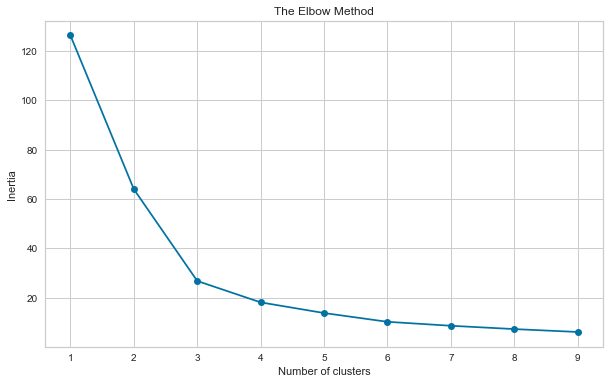

In [64]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### 2.1 1차 k-mens, N_cluster = 3

In [65]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(pca_transformed)

KMeans(n_clusters=3, random_state=0)

In [66]:
kmeans.labels_
df = tmp_df.copy()
df['km_cluster'] = kmeans.labels_
df.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
km_cluster,,,,,,,,,,,,,,,,,,,
0,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233
1,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65
2,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128


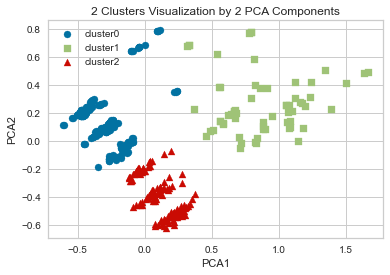

In [67]:
df['pca_x'] = pca_transformed[:,0]
df['pca_y'] = pca_transformed[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df[df['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>','<']
for i in range(marker_n):
    plt.scatter(x = df.loc[markers[i], 'pca_x'], y = df.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('2 Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2','cluster3','cluster4','cluster5'])
plt.show()

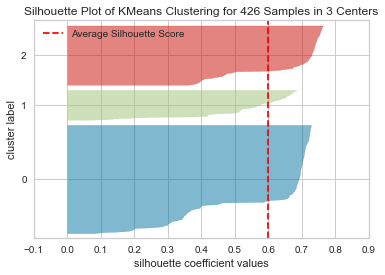

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 426 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [68]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed)      
visualizer.show()
# sil_avg = silhouette_score(data,kmeans.fit(pca_transformed))
# print(sil_avg)

In [69]:
score = silhouette_score(data,df['km_cluster'])
print('기본 데이터 셋 Silhouette Score : {0: .3f}'.format(score))

기본 데이터 셋 Silhouette Score :  0.329


**각 군집 별 데이터 확인**

In [70]:
df_cluster_2 = df[df['km_cluster'] == 2][col]

In [71]:
df_cluster_2.describe() # std 값이 Nan 인 이유는 집단의 객체가 1개이기 때문
# 소음 신고 건수가 50000건 이상

,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,km_cluster,pca_x,pca_y
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.0,128.000000,128.000000
mean,22.699516,1.170313,40.976228,52.519866,46.189695,30.159580,0.362370,0.884524,0.125539,1.859375,0.671094,0.226562,5.142820,2.461254,3.783724,1.704781,2.0,0.105590,-0.393702
std,10.199156,0.745200,22.642488,23.513721,25.272545,23.354226,0.600737,0.961782,0.274514,0.770871,1.067137,0.765546,3.686213,2.109727,2.428693,1.048837,0.0,0.121561,0.132821
min,5.000000,0.000000,2.000000,8.000000,3.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,-0.120460,-0.621547
25%,16.375000,0.833333,25.750000,35.500000,26.000000,13.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,1.000000,2.000000,1.000000,2.0,0.025035,-0.507170
50%,20.142857,1.000000,38.083333,49.750000,42.375000,24.000000,0.000000,0.666667,0.000000,2.000000,0.000000,0.000000,4.500000,2.166667,3.500000,1.916667,2.0,0.093451,-0.395046
75%,25.625000,1.541667,52.083333,64.625000,64.625000,43.500000,0.500000,1.000000,0.000000,2.000000,1.000000,0.000000,6.500000,3.446429,5.166667,2.500000,2.0,0.204934,-0.290856
max,61.000000,3.000000,121.000000,124.000000,101.000000,120.666667,3.000000,5.000000,1.000000,3.000000,4.333333,5.000000,26.000000,12.000000,10.000000,5.000000,2.0,0.373653,-0.072700


In [72]:
df_cluster_1 = df[df['km_cluster'] == 1][col] # 386개

In [73]:
df_cluster_1.describe()
# 소음 건수 : min = 125.75, max = 6510

,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,km_cluster,pca_x,pca_y
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.0,65.000000,65.000000
mean,38.348077,1.589103,129.623718,156.591667,130.646795,55.610897,0.949359,4.461538,0.527564,1.830769,2.591667,0.166667,18.103846,9.637179,8.351282,3.714103,1.0,0.861256,0.265621
std,19.914578,0.939462,85.440702,90.700946,98.090113,39.853711,1.081090,4.025151,0.698238,1.097856,2.993421,0.476897,11.401783,7.834683,4.996646,2.291144,0.0,0.307853,0.211146
min,11.000000,0.000000,37.000000,53.000000,1.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.312827,-0.048703
25%,24.000000,1.000000,78.500000,99.500000,78.500000,22.750000,0.000000,1.500000,0.000000,1.000000,0.500000,0.000000,10.000000,4.000000,5.000000,2.000000,1.0,0.659391,0.118505
50%,34.000000,1.500000,93.250000,143.000000,110.500000,49.583333,1.000000,3.000000,0.250000,2.000000,2.000000,0.000000,15.000000,6.500000,7.000000,3.500000,1.0,0.823860,0.214352
75%,45.500000,2.000000,155.000000,185.500000,154.000000,72.750000,1.500000,6.000000,1.000000,2.000000,3.250000,0.000000,20.750000,13.000000,10.500000,5.000000,1.0,1.082445,0.383947
max,102.000000,4.500000,395.500000,413.500000,492.250000,207.000000,4.250000,18.500000,4.000000,5.000000,15.000000,3.000000,60.000000,32.500000,24.000000,12.000000,1.0,1.659178,0.778787


In [74]:
df_cluster_0 = df[df['km_cluster'] == 0][col] # 39개

In [75]:
df_cluster_0.describe()
# 소음 건수 : min = 6890, max = 27744
# 병원 및 약국의 수치가 조금 더 높음

,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,km_cluster,pca_x,pca_y
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.0,233.000000,233.000000
mean,18.960673,1.085443,43.778975,46.832613,52.251834,33.548779,0.484585,0.651420,0.157250,5.184549,1.092883,0.133763,5.742356,2.590313,3.149571,1.855671,0.0,-0.298271,0.142182
std,8.751600,0.520429,14.912338,16.223503,37.969640,19.024630,0.450442,0.535287,0.175400,0.774219,0.962789,0.451449,3.110565,1.686973,1.454221,0.794144,0.0,0.150758,0.190716
min,4.333333,0.000000,5.000000,3.166667,3.000000,2.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.0,-0.607481,-0.187093
25%,13.500000,0.833333,33.666667,37.333333,30.636364,20.000000,0.166667,0.285714,0.000000,5.000000,0.500000,0.000000,3.500000,1.333333,2.166667,1.400000,0.0,-0.422118,0.050164
50%,17.555556,1.000000,44.666667,47.000000,42.000000,30.333333,0.375000,0.500000,0.125000,5.000000,1.000000,0.000000,5.000000,2.000000,3.000000,1.714286,0.0,-0.301778,0.118438
75%,22.272727,1.363636,52.000000,57.500000,58.125000,41.875000,0.666667,1.000000,0.250000,6.000000,1.600000,0.000000,7.800000,3.500000,3.888889,2.500000,0.0,-0.235457,0.224237
max,83.272727,2.500000,75.000000,102.500000,215.600000,99.000000,2.000000,2.250000,0.666667,6.000000,4.400000,3.000000,15.500000,7.000000,7.800000,4.500000,0.0,0.241556,0.791858


### 2.2 2차 k-means

#### km_cluster == 0

In [76]:
df_1 = df[df['km_cluster'] == 0]
df_1 = df_1.drop('km_cluster',axis=1)
df_1

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
index,,,,,,,,,,,,,,,,,,,,,
12,종로구,창신1동,1111067000,8.333333,1.00,21.333333,16.666667,6.0,9.666667,0.00,0.00,0.333333,5.0,0.0,0.0,1.0,0.333333,0.00,0.333333,-0.449496,-0.019644
13,종로구,창신2동,1111068000,5.333333,1.00,21.333333,16.666667,6.0,9.666667,0.00,0.00,0.333333,5.0,0.0,0.0,1.0,0.333333,0.00,0.333333,-0.454986,-0.021435
14,종로구,창신3동,1111069000,6.333333,1.00,21.333333,16.666667,6.0,9.666667,0.00,0.00,0.333333,5.0,0.0,0.0,1.0,0.333333,0.00,0.333333,-0.453156,-0.020838
15,종로구,숭인1동,1111070000,10.000000,1.50,17.500000,19.500000,8.0,15.500000,0.00,0.50,0.000000,4.0,1.5,0.0,2.5,1.000000,2.00,1.000000,-0.265404,-0.126331
16,종로구,숭인2동,1111071000,9.000000,1.50,17.500000,19.500000,8.0,15.500000,0.00,0.50,0.000000,4.0,1.5,0.0,2.5,1.000000,2.00,1.000000,-0.267234,-0.126928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,송파구,잠실2동,1171067000,15.500000,0.25,74.250000,39.750000,75.5,9.000000,0.75,0.75,0.500000,5.0,3.5,3.0,10.5,3.750000,2.75,2.500000,-0.292922,0.072141
403,송파구,잠실3동,1171068000,28.500000,0.25,74.250000,39.750000,75.5,9.000000,0.75,0.75,0.500000,5.0,3.5,3.0,10.5,3.750000,2.75,2.500000,-0.269135,0.079903
404,송파구,잠실4동,1171069000,13.500000,0.50,75.000000,39.000000,58.5,16.000000,0.50,1.50,0.000000,4.0,1.0,0.0,7.5,2.500000,3.50,1.500000,-0.221471,-0.117039


In [77]:
col_1 = df_1.columns[3:-2]
data_1 = df_1[col_1].values

In [78]:
pca_transformed_1 = pca.fit_transform(data_1)
df_1['pca_x'] = pca_transformed_1[:,0]
df_1['pca_y'] = pca_transformed_1[:,1]
df_1

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
index,,,,,,,,,,,,,,,,,,,,,
12,종로구,창신1동,1111067000,8.333333,1.00,21.333333,16.666667,6.0,9.666667,0.00,0.00,0.333333,5.0,0.0,0.0,1.0,0.333333,0.00,0.333333,-59.079859,-25.776724
13,종로구,창신2동,1111068000,5.333333,1.00,21.333333,16.666667,6.0,9.666667,0.00,0.00,0.333333,5.0,0.0,0.0,1.0,0.333333,0.00,0.333333,-59.185685,-26.124392
14,종로구,창신3동,1111069000,6.333333,1.00,21.333333,16.666667,6.0,9.666667,0.00,0.00,0.333333,5.0,0.0,0.0,1.0,0.333333,0.00,0.333333,-59.150410,-26.008503
15,종로구,숭인1동,1111070000,10.000000,1.50,17.500000,19.500000,8.0,15.500000,0.00,0.50,0.000000,4.0,1.5,0.0,2.5,1.000000,2.00,1.000000,-56.384266,-21.455810
16,종로구,숭인2동,1111071000,9.000000,1.50,17.500000,19.500000,8.0,15.500000,0.00,0.50,0.000000,4.0,1.5,0.0,2.5,1.000000,2.00,1.000000,-56.419541,-21.571699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,송파구,잠실2동,1171067000,15.500000,0.25,74.250000,39.750000,75.5,9.000000,0.75,0.75,0.500000,5.0,3.5,3.0,10.5,3.750000,2.75,2.500000,23.579594,-20.546419
403,송파구,잠실3동,1171068000,28.500000,0.25,74.250000,39.750000,75.5,9.000000,0.75,0.75,0.500000,5.0,3.5,3.0,10.5,3.750000,2.75,2.500000,24.038172,-19.039855
404,송파구,잠실4동,1171069000,13.500000,0.50,75.000000,39.000000,58.5,16.000000,0.50,1.50,0.000000,4.0,1.0,0.0,7.5,2.500000,3.50,1.500000,8.837874,-10.389231


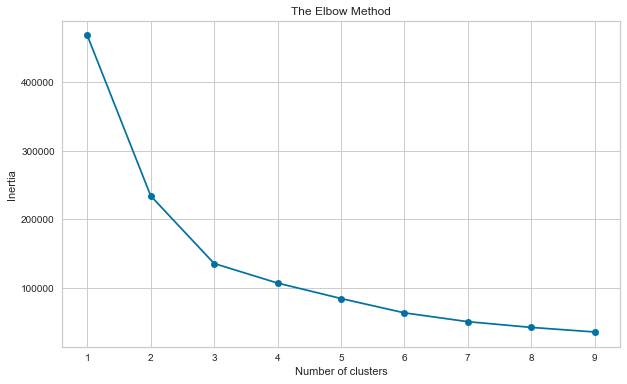

In [79]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_1)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [81]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
# label
label_1 = kmeans.fit(pca_transformed_1)
# Getting unique labels
u_labels = np.unique(label_1)

In [82]:
df_1['km_cluster_1'] = kmeans.labels_
df_1.groupby('km_cluster_1').count()

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
km_cluster_1,,,,,,,,,,,,,,,,,,,,,
0,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
1,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
2,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87


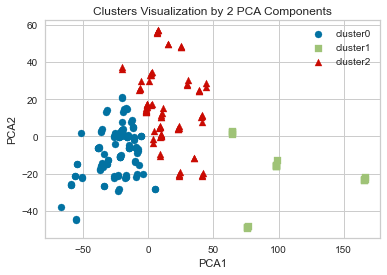

In [83]:
df_1['pca_x'] = pca_transformed_1[:,0]
df_1['pca_y'] = pca_transformed_1[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_1['km_cluster_1'].unique())
markers = []
for i in range(marker_n):
    marker = df_1[df_1['km_cluster_1'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_1.loc[markers[i], 'pca_x'], y = df_1.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2'])
plt.show()

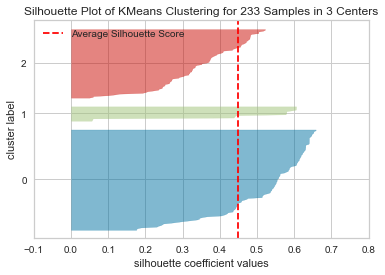

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 233 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [84]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed_1)      
visualizer.show()

In [85]:
score = silhouette_score(data_1,df_1['km_cluster_1'])
print('기본 데이터 셋 Silhouette Score : {0: .3f}'.format(score))

기본 데이터 셋 Silhouette Score :  0.345


#### km_cluster == 2

In [101]:
df_2 = df[df['km_cluster'] == 2]
df_2 = df_2.drop('km_cluster',axis=1)
df_2

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
index,,,,,,,,,,,,,,,,,,,,,
0,종로구,청운효자동,1111051500,20.000000,3.0,16.000000,43.666667,25.0,7.333333,0.000000,0.333333,0.0,1.0,1.000000,0.0,0.0,0.000000,1.000000,2.000000,0.182533,-0.542125
2,종로구,삼청동,1111054000,19.000000,1.0,9.000000,54.000000,4.0,11.000000,0.000000,1.000000,0.0,1.0,0.000000,1.0,3.0,0.000000,1.000000,0.000000,0.126112,-0.594335
3,종로구,부암동,1111055000,14.000000,1.0,5.000000,38.000000,30.0,5.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,2.0,2.000000,5.000000,3.000000,0.171114,-0.537946
4,종로구,평창동,1111056000,44.000000,1.0,19.000000,42.000000,29.0,10.000000,0.000000,1.000000,0.0,1.0,0.000000,0.0,5.0,5.000000,0.000000,0.000000,0.202816,-0.539939
5,종로구,무악동,1111057000,8.000000,0.0,10.000000,12.000000,22.0,13.000000,0.000000,0.000000,0.0,2.0,0.000000,0.0,0.0,1.000000,1.000000,0.000000,-0.088681,-0.470344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,강동구,성내1동,1174064000,11.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.0,3.0,1.666667,0.0,10.0,4.666667,6.666667,2.666667,0.024733,-0.183659
421,강동구,성내2동,1174065000,17.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.0,3.0,1.666667,0.0,10.0,4.666667,6.666667,2.666667,0.035712,-0.180077
422,강동구,성내3동,1174066000,15.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.0,3.0,1.666667,0.0,10.0,4.666667,6.666667,2.666667,0.032052,-0.181271


In [102]:
col_2 = df_2.columns[3:-2]
data_2 = df_2[col_2].values

In [103]:
pca_transformed_2 = pca.fit_transform(data_2)
df_2['pca_x'] = pca_transformed_2[:,0]
df_2['pca_y'] = pca_transformed_2[:,1]
df_2

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
index,,,,,,,,,,,,,,,,,,,,,
0,종로구,청운효자동,1111051500,20.000000,3.0,16.000000,43.666667,25.0,7.333333,0.000000,0.333333,0.0,1.0,1.000000,0.0,0.0,0.000000,1.000000,2.000000,-39.858028,-5.895918
2,종로구,삼청동,1111054000,19.000000,1.0,9.000000,54.000000,4.0,11.000000,0.000000,1.000000,0.0,1.0,0.000000,1.0,3.0,0.000000,1.000000,0.000000,-51.172659,-14.819027
3,종로구,부암동,1111055000,14.000000,1.0,5.000000,38.000000,30.0,5.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,2.0,2.000000,5.000000,3.000000,-46.039369,0.375930
4,종로구,평창동,1111056000,44.000000,1.0,19.000000,42.000000,29.0,10.000000,0.000000,1.000000,0.0,1.0,0.000000,0.0,5.0,5.000000,0.000000,0.000000,-31.757259,-1.650662
5,종로구,무악동,1111057000,8.000000,0.0,10.000000,12.000000,22.0,13.000000,0.000000,0.000000,0.0,2.0,0.000000,0.0,0.0,1.000000,1.000000,0.000000,-56.169655,20.206949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,강동구,성내1동,1174064000,11.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.0,3.0,1.666667,0.0,10.0,4.666667,6.666667,2.666667,36.126906,-34.272075
421,강동구,성내2동,1174065000,17.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.0,3.0,1.666667,0.0,10.0,4.666667,6.666667,2.666667,36.928062,-33.905788
422,강동구,성내3동,1174066000,15.333333,1.0,72.666667,86.333333,65.0,20.666667,0.666667,1.333333,0.0,3.0,1.666667,0.0,10.0,4.666667,6.666667,2.666667,36.661010,-34.027884


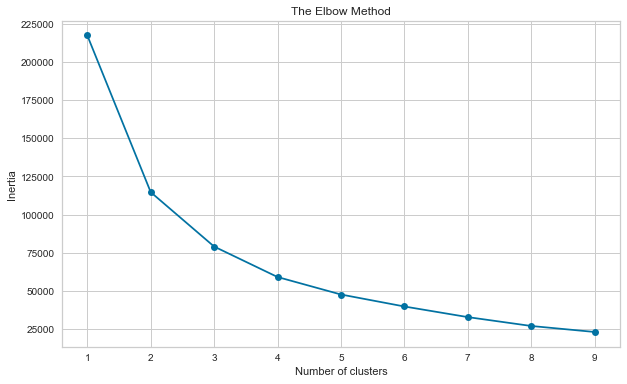

In [104]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_2)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [107]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
# label
label_2 = kmeans.fit(pca_transformed_2)
# Getting unique labels
u_labels = np.unique(label_2)

In [108]:
df_2['km_cluster_2'] = kmeans.labels_
df_2.groupby('km_cluster_2').count()

,GU,DONG,DONG_CODE,TRANSPORT,SECURITY,HEALTH,CONVINIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
km_cluster_2,,,,,,,,,,,,,,,,,,,,,
0,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55
1,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41
2,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32


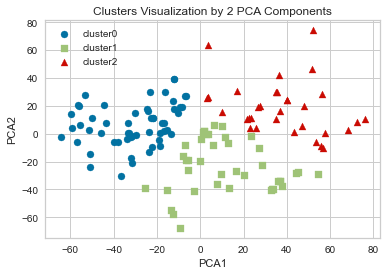

In [109]:
df_2['pca_x'] = pca_transformed_2[:,0]
df_2['pca_y'] = pca_transformed_2[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_2['km_cluster_2'].unique())
markers = []
for i in range(marker_n):
    marker = df_2[df_2['km_cluster_2'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_2.loc[markers[i], 'pca_x'], y = df_2.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2'])
plt.show()

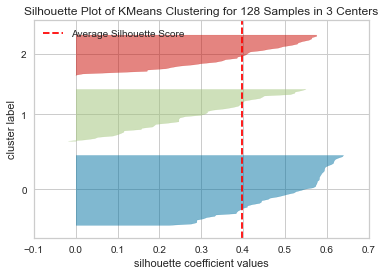

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 128 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [110]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed_2)      
visualizer.show()

In [111]:
score = silhouette_score(data_1,df_1['km_cluster_1'])
print('기본 데이터 셋 Silhouette Score : {0: .3f}'.format(score))

기본 데이터 셋 Silhouette Score :  0.345
